# Demo lufo

### <font color="#3333cc"><a name="section_1"></a> 1. a very short introduction</font>

### <font color="#3333cc"><a name="section_2"></a>2. used packages</font>

In [1]:
import geopandas as gpd
import pandas as pd
import networkx as nx
from owslib.wfs import WebFeatureService
import owslib
import datetime
from progressbar import ProgressBar

/home/nico/apps/environments/pynetworkanalysis/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import bfs_poi_afstand as bfs

### package versions

In [3]:
print('pandas:', pd.__version__)
print('Geopandas:', gpd.__version__)
print('networkx:', nx.__version__)
print('owslib:', owslib.__version__)

pandas: 1.1.3
Geopandas: 0.8.1
networkx: 2.5
owslib: 0.20.0


## setup your basedir for the files and the url for your services

In [4]:
# basedir for your files, ending with as slash
data_dir='/home/nico/data/tmp/'
lufo_url='https://map.data.amsterdam.nl/maps/lufo?SERVICE=wms&crs=epsg:28992'
#output
image_file=data_dir + 'uitsnede_amsterdam.tiff'

In [5]:
from owslib.wms import WebMapService
wms = WebMapService(lufo_url)
print(wms.getOperationByName('GetMap').formatOptions)

['image/png', 'image/png; mode=8bit', 'image/gif', 'image/jpeg', 'image/svg+xml', 'application/vnd.google-earth.kml.xml', 'application/vnd.google-earth.kmz', 'image/tiff', 'image/vnd.jpeg-png', 'image/vnd.jpeg-png8', 'application/x-pdf', 'application/x-protobuf', 'application/json']


In [6]:
print('available map layers: \n',list(wms.contents))

available map layers: 
 ['LUFO', 'lufo', 'lufo2020', 'lufo2019', 'lufo2018', 'lufo2017', 'lufo2016', 'lufo2015', 'lufo2014', 'lufo2013', 'lufo2012', 'lufo2011', 'lufo2010', 'lufo2009', 'lufo2008', 'lufo2007', 'lufo2006', 'lufo2005', 'lufo2004', 'lufo2003']


In [7]:
# define map center and bbox
# map center
x=122279.0
y=486246.0

# image size (real world size)
image_width=5000
image_height=5000

# image resolution , bases on 0.20 M ground resolution
# pixel size im M
pixelsize=1.5
map_resolution = 1.0 / pixelsize
print('map resolution:',map_resolution)

# Define image size
# WIDTH and HEIGHT must be between 1 and 4000 pixels for this wms !!!!
image_sizexres=round(image_width * map_resolution)
image_sizeyres=round(image_height * map_resolution)
print('xres:',image_sizexres)
print('yres:',image_sizeyres)
mybbox = (x-(image_width/2), y-(image_height/2), x+(image_width/2), y+(image_height/2))

map resolution: 0.6666666666666666
xres: 3333
yres: 3333


In [8]:
img = wms.getmap(   layers=['lufo2020'],
                         srs='EPSG:28992',
                         bbox =mybbox,
                         size=(image_sizexres, image_sizeyres),
                        format='image/tiff',
                         transparent=True
                         )
out = open(image_file, 'wb')
out.write(img.read())
out.close()

In [9]:
import rasterio
from rasterio.plot import show

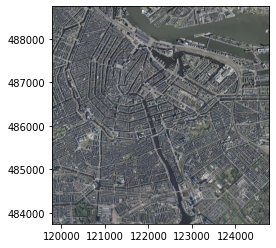

<AxesSubplot:>

In [10]:
fp = image_file
img = rasterio.open(fp)
show(img)